### Group 19:
Jianting Liu(8950907)


### Strawberry disease detection(image classification)

**import libraries**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pathlib

## 1. Obtain the Data: Get strawberry dataset 
**Download dataset from Kaggle:https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset**

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array, save_img
import os

datagen = ImageDataGenerator(
   rotation_range=40,
   width_shift_range=0.2,
   height_shift_range=0.2,
   horizontal_flip=True,
   fill_mode='nearest'
)

def augment_images(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    total_processed = 0
    
    image_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    print(f"Found {len(image_files)} images to process")
    
    for img_file in image_files:
        try:
            img_path = os.path.join(input_dir, img_file)
            img = load_img(img_path)
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)
            
            for batch in datagen.flow(x, 
                                batch_size=1,
                                save_to_dir=output_dir, 
                                save_prefix=f'aug_{img_file[:-4]}', 
                                save_format='JPG'):
                total_processed += 1
                print(f"Generated image {total_processed} from {img_file}")
                break
                
        except Exception as e:
            print(f"Error processing {img_file}: {e}")
            
    print(f"Finished: Generated {total_processed} new images")

input_dir = "./data/strawberry/Strawberry___healthy"
output_dir = "./data/strawberry/aug"
augment_images(input_dir, output_dir)

Found 456 images to process
Generated image 1 from strawberry_healthy_188.JPG
Generated image 2 from strawberry_healthy_177.JPG
Generated image 3 from strawberry_healthy_59.JPG
Generated image 4 from strawberry_healthy_163.JPG
Generated image 5 from strawberry_healthy_65.JPG
Generated image 6 from strawberry_healthy_71.JPG
Generated image 7 from strawberry_healthy_375.JPG
Generated image 8 from strawberry_healthy_413.JPG
Generated image 9 from strawberry_healthy_407.JPG
Generated image 10 from strawberry_healthy_361.JPG
Generated image 11 from strawberry_healthy_349.JPG
Generated image 12 from strawberry_healthy_201.JPG
Generated image 13 from strawberry_healthy_215.JPG
Generated image 14 from strawberry_healthy_229.JPG
Generated image 15 from strawberry_healthy_228.JPG
Generated image 16 from strawberry_healthy_214.JPG
Generated image 17 from strawberry_healthy_200.JPG
Generated image 18 from strawberry_healthy_348.JPG
Generated image 19 from strawberry_healthy_406.JPG
Generated image

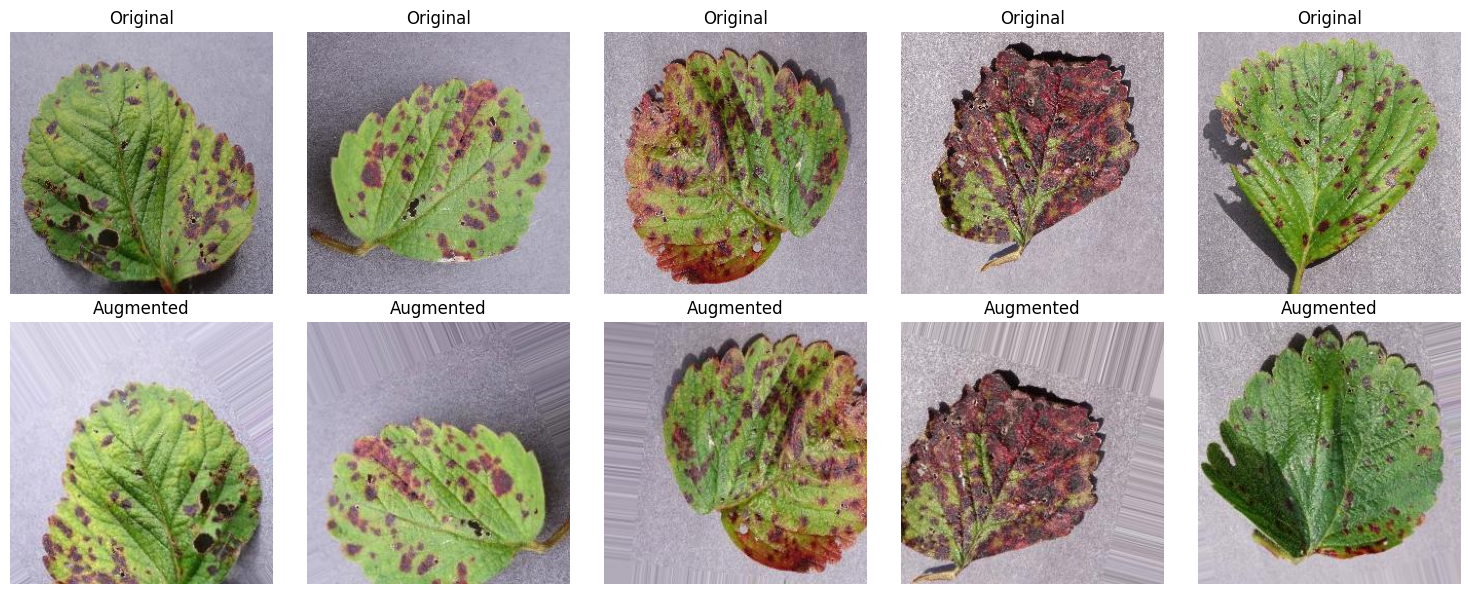

In [22]:
import matplotlib.pyplot as plt
import random
from tensorflow.keras.utils import load_img
import os

# Get 5 random original images
input_dir = "./data/strawberry/Strawberry___Leaf_scorch"
output_dir = "./data/strawberry/test"

original_images = [f for f in os.listdir(input_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
selected_images = random.sample(original_images, 5)

# Plot comparison
plt.figure(figsize=(15, 6))
for idx, img_name in enumerate(selected_images):
   # Original image
   orig_img = load_img(os.path.join(input_dir, img_name))
   
   # Find corresponding augmented image
   aug_name = [f for f in os.listdir(output_dir) if f.startswith(f'aug_{img_name[:-4]}')][0]
   aug_img = load_img(os.path.join(output_dir, aug_name))
   
   # Plot original
   plt.subplot(2, 5, idx+1)
   plt.imshow(orig_img)
   plt.title('Original')
   plt.axis('off')
   
   # Plot augmented
   plt.subplot(2, 5, idx+6)
   plt.imshow(aug_img)
   plt.title('Augmented')
   plt.axis('off')

plt.tight_layout()
plt.show()

In [25]:
import os

def rename_images_in_folder(folder, prefix):
    """
    Renames all images in a specified folder with a given prefix.

    Args:
        folder (str): Path to the folder containing the images.
        prefix (str): Prefix for the new image names.
    """
    # Get a list of files in the folder
    files = os.listdir(folder)

    # Filter only files with common image extensions
    valid_extensions = {".jpg", ".jpeg", ".png", ".bmp", ".gif"}
    images = [file for file in files if os.path.splitext(file)[1].lower() in valid_extensions]

    # Rename the images
    for index, image in enumerate(images, start=1):
        # Get the file extension
        extension = os.path.splitext(image)[1]
        
        # Create the new name
        new_name = f"{prefix}{index}{extension}"
        
        # Full paths for the current and new files
        current_path = os.path.join(folder, image)
        new_path = os.path.join(folder, new_name)
        
        # Rename the file
        os.rename(current_path, new_path)

    print(f"{len(images)} images have been renamed in the folder {folder}.")

# Usage examples
rename_images_in_folder("./data/strawberry/Strawberry___healthy", "strawberry_healthy_")
rename_images_in_folder("./data/strawberry/Strawberry___Leaf_scorch", "strawberry_leaf_scorch_")




558 images have been renamed in the folder ./data/strawberry/Strawberry___healthy.
1109 images have been renamed in the folder ./data/strawberry/Strawberry___Leaf_scorch.


In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("./data/kaggle_dogs_vs_cats/train")
new_base_dir = pathlib.Path("./data/kaggle_dogs_vs_cats_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)


In [ ]:
data_folder = pathlib.Path('../data/strawberry')

from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    data_folder / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    data_folder / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    data_folder / "test",
    image_size=(180, 180),
    batch_size=32)

